## 绘制训练记录

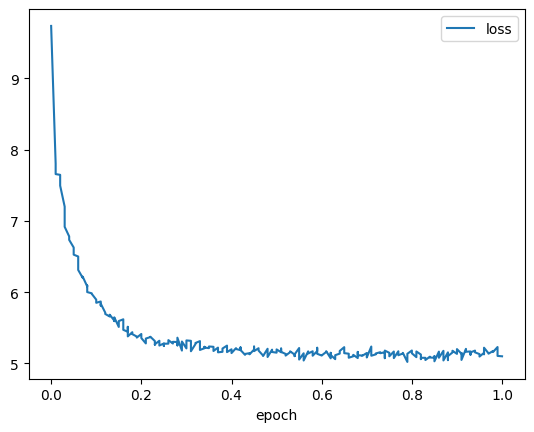

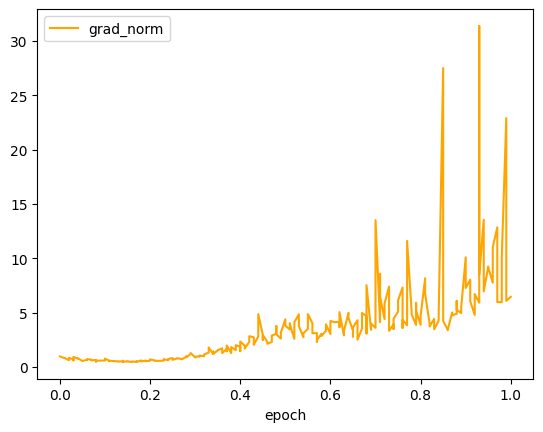

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./output/train_record.csv')
df.plot(x='epoch', y=['loss'], kind='line')
df.plot(x='epoch', y=['grad_norm'], kind='line', color='orange')
plt.show()

## 合并模型参数分片

In [ ]:
from deepspeed.utils.zero_to_fp32 import convert_zero_checkpoint_to_fp32_state_dict

checkpoint_dir = "./output/checkpoint-4706"  # 分片文件所在目录
output_file = "./output/pytorch_model"  # 合并后输出路径

# 合并模型参数分片
convert_zero_checkpoint_to_fp32_state_dict(checkpoint_dir, output_file)

## 推理

In [8]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model = AutoModelForCausalLM.from_pretrained(
    "./output/pytorch_model",
    device_map="auto",
    torch_dtype=torch.float16,
)
tokenizer = AutoTokenizer.from_pretrained("./output/pytorch_model")

In [14]:
text = "【圣安娜县 (厄瓜多尔)】"
input_ids = tokenizer(text, return_tensors="pt").input_ids.to("cuda")
output = model.generate(input_ids, max_new_tokens=100)
print(tokenizer.decode(output[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


【圣安娜县 (厄瓜多尔)】圣彼得县（Cé County）是美国堪萨斯州所辖的一个县。== 地理 ==圣彼得县的座县，而该地的面积为UTC-6，即北美中部时区为UTC-6，即北美中部时区（EST）。== 参考文献 ==*  archivedate=2016，位于法国上法兰克西塔尼半岛西部省份，为UTC-6，快时针为UTC-6，
